In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Reading Data

In [2]:
Data = pd.read_csv('data.csv')
InternetData = pd.read_csv('food-footprints.csv')

## Preprocessing on Scrapped Data

In [3]:
#checking if there's any null value
print(Data.isnull().sum())

item          0
CO2_per_kg    0
CO2_level     0
dtype: int64


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


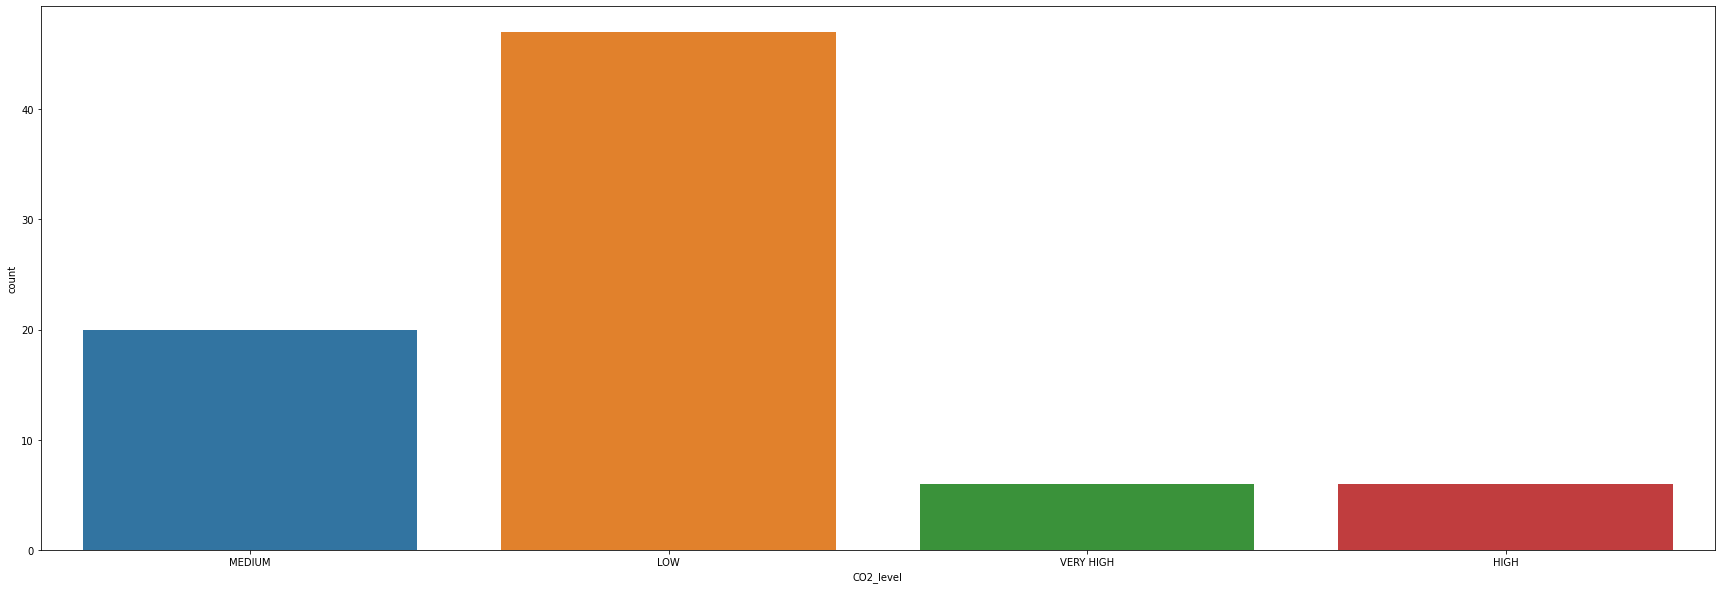

In [4]:
#checking the count of every category in CO2_level
plt.figure(figsize=(30, 10))
sns.countplot(Data['CO2_level'])
plt.show()

In [5]:
#scale data using normalization
Numeric_Columns = Data.select_dtypes(np.number).columns
Norm = MinMaxScaler().fit(Data[Numeric_Columns])
Data[Numeric_Columns] = Norm.transform(Data[Numeric_Columns])

In [6]:
Data.head()

,item,CO2_per_kg,CO2_level
0,Almonds,0.091331,MEDIUM
1,Apple pie,0.041796,MEDIUM
2,Apples,0.001548,LOW
3,"Apricots, dried",0.034056,LOW
4,Avocado,0.013932,LOW


c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


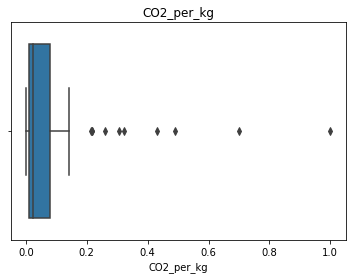

In [7]:
#checking outliers in CO2_per_kg
sns.boxplot(Data['CO2_per_kg']).set_title('CO2_per_kg')
plt.show()

In [8]:
#replacing outliers in CO2_per_kg by IQR
Q1 = Data['CO2_per_kg'].quantile(0.25)
Q3 = Data['CO2_per_kg'].quantile(0.75)
IQR = Q3 - Q1

lower_IQR = Q1 - (IQR)
upper_IQR = Q3 + (IQR)
Data['CO2_per_kg']=np.where(Data['CO2_per_kg']>upper_IQR,upper_IQR,np.where(Data['CO2_per_kg']<lower_IQR,lower_IQR,Data['CO2_per_kg']))

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


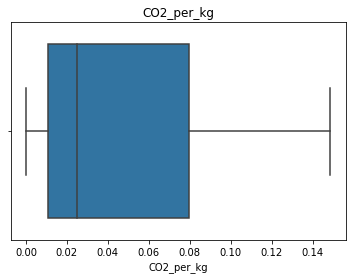

In [9]:
#Drawing boxplot after removing outliers
sns.boxplot(Data['CO2_per_kg']).set_title('CO2_per_kg')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

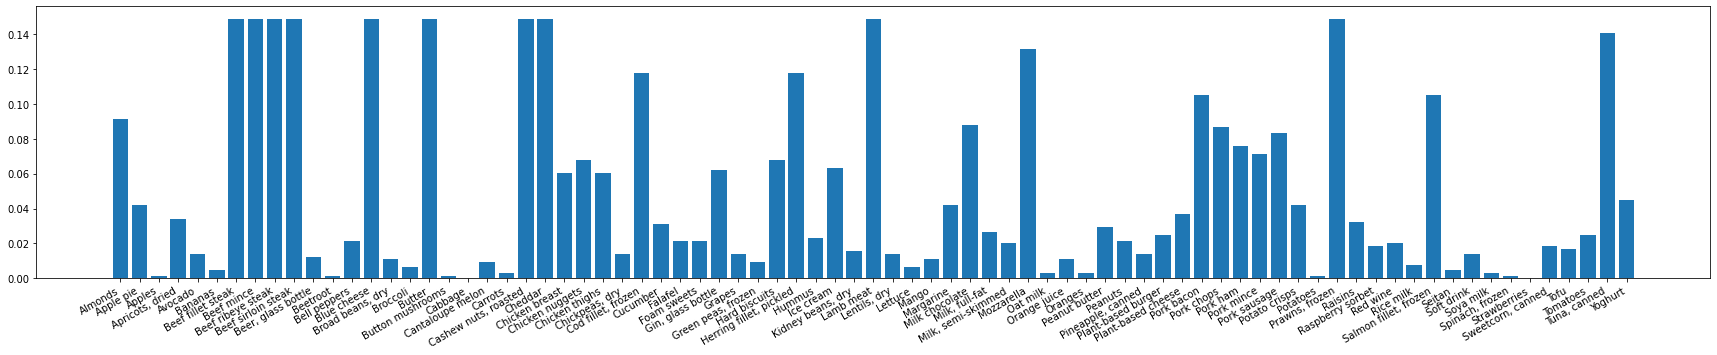

In [10]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.bar(Data['item'], Data['CO2_per_kg'])
plt.xticks(rotation=30, ha='right')

## Preprocessing for Internet Data

In [11]:
#checking if there's any null value
print(InternetData.isnull().sum())

Emissions per kilogram                        0
Emissions per 1000 kilocalories               0
Emissions per 100 grams of protein            2
Emissions per 100 grams of fat                0
Land use per kilogram                         0
Land use per 1000 kilocalories                0
Land use per 100 grams of protein             2
Land use per 100 grams of fat                 0
Eutrophication per kilogram                   0
Eutrophication per 1000 kilocalories          0
Eutrophication per 100 grams of protein       2
Eutrophication per 100 grams of fat           0
Water scarcity per kilogram                   0
Water scarcity per 1000 kilocalories          0
Water scarcity per 100 grams of protein       2
Water scarcity per 100 grams of fat           0
Water withdrawals per kilogram                0
Water withdrawals per 1000 kilocalories       0
Water withdrawals per 100 grams of protein    2
Water withdrawals per 100 grams of fat        0
Entity                                  

In [12]:
#Drop Nans
InternetData = InternetData.dropna()

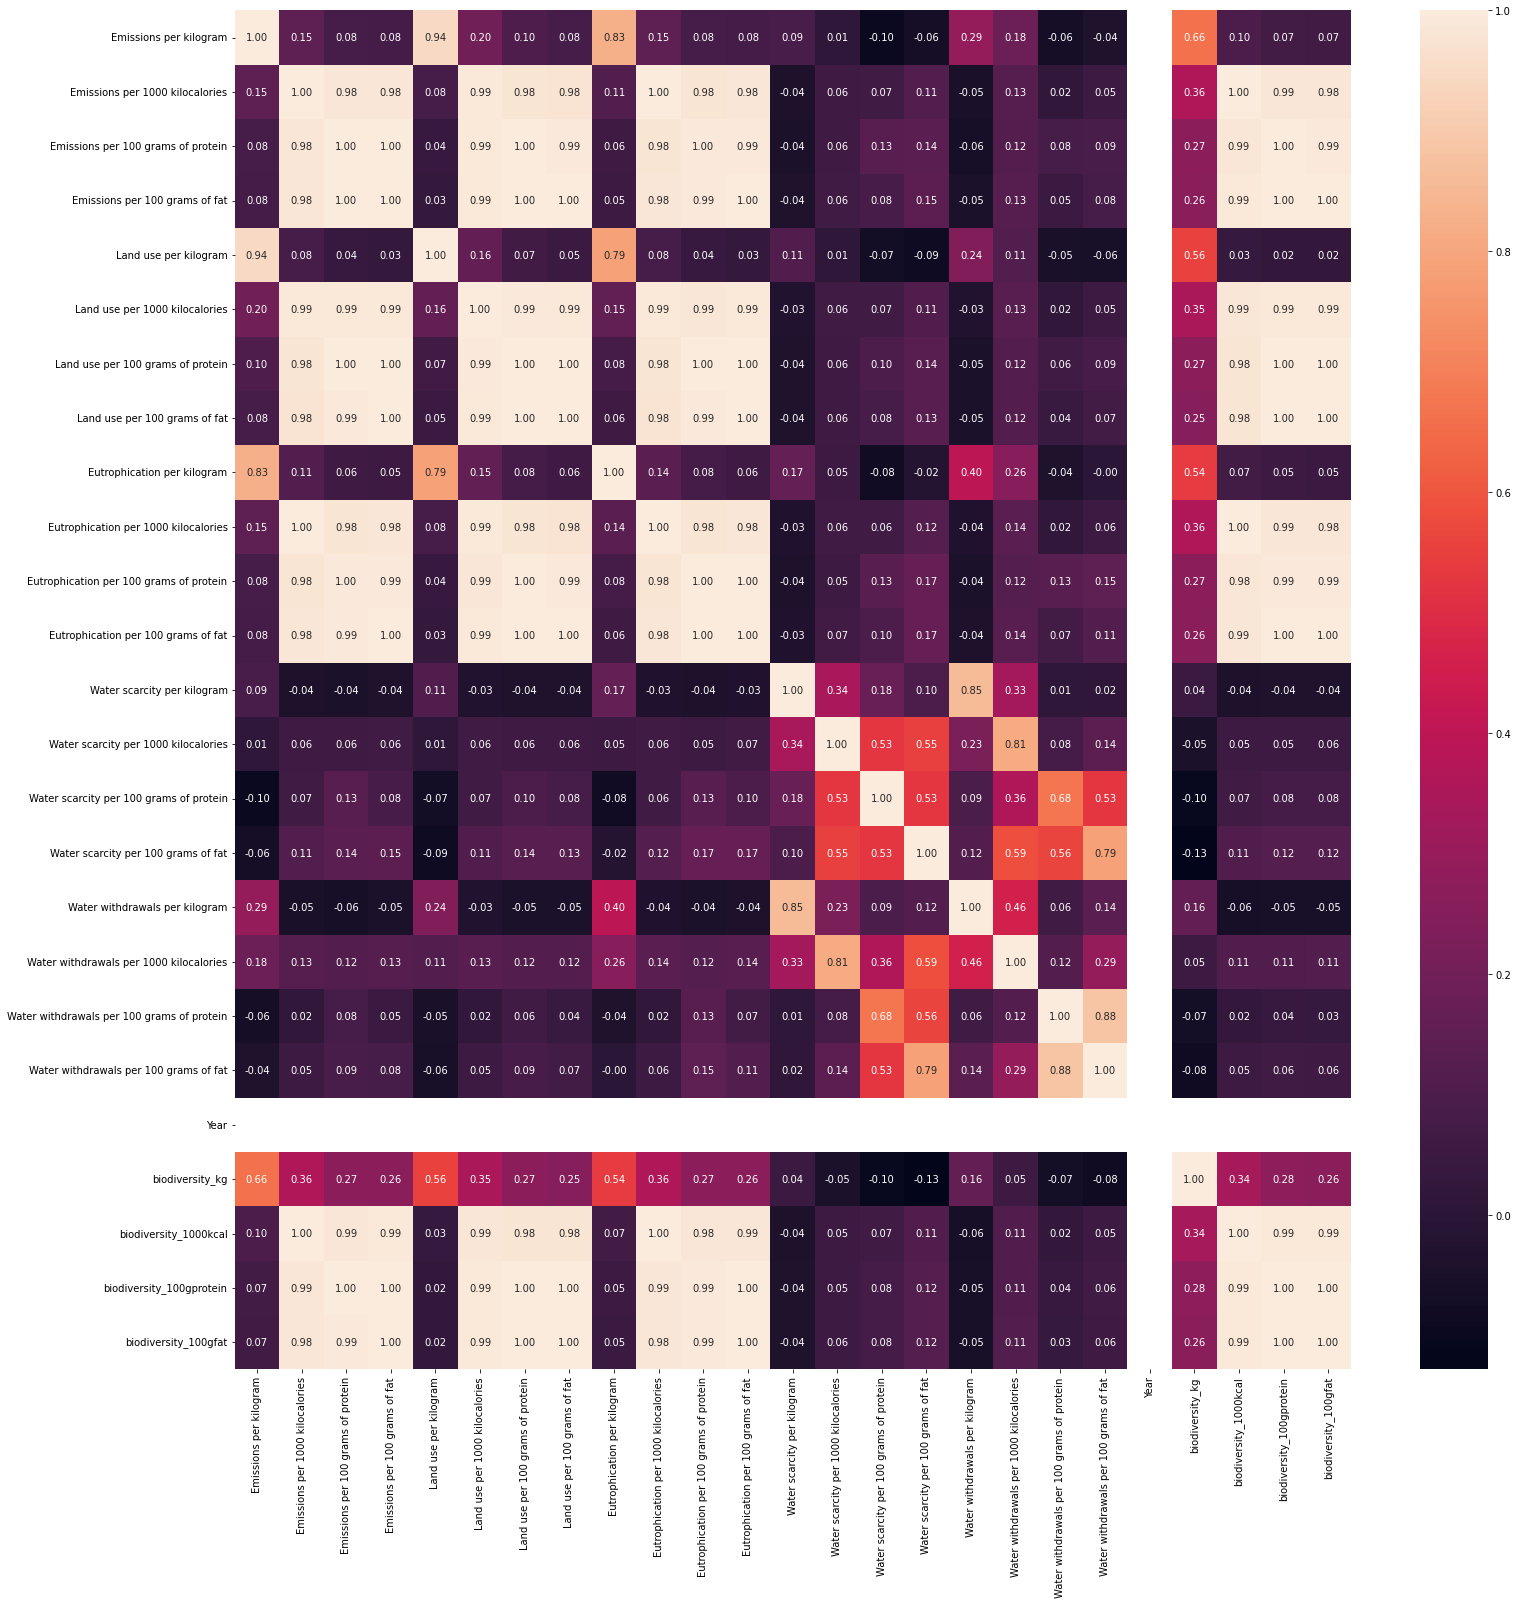

In [13]:
#Checking the correlation between Columns
fig = plt.figure(figsize=(25,25))
dataplot = sns.heatmap(InternetData.corr(), annot=True, fmt = '.2f')
plt.show()

In [14]:
#scale data using normalization
Numeric_Columns = InternetData.select_dtypes(np.number).columns
Norm = MinMaxScaler().fit(InternetData[Numeric_Columns])
InternetData[Numeric_Columns] = Norm.transform(InternetData[Numeric_Columns])

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


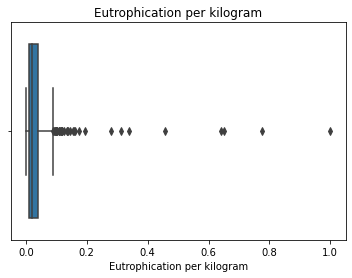

In [15]:
#checking outliers in Eutrophication per kilogram
#I have chosen this column as it's equal to CO2_per_kg in the first data
sns.boxplot(InternetData['Eutrophication per kilogram']).set_title('Eutrophication per kilogram')
plt.show()

In [16]:
#replacing outliers in CO2_per_kg by IQR
Q1 = InternetData['Eutrophication per kilogram'].quantile(0.25)
Q3 = InternetData['Eutrophication per kilogram'].quantile(0.75)
IQR = Q3 - Q1

lower_IQR = Q1 - (IQR)
upper_IQR = Q3 + (IQR)
InternetData['Eutrophication per kilogram']=np.where(InternetData['Eutrophication per kilogram']>upper_IQR,upper_IQR,np.where(InternetData['Eutrophication per kilogram']<lower_IQR,lower_IQR,InternetData['Eutrophication per kilogram']))

c:\Users\salma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


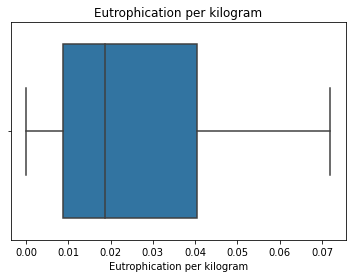

In [17]:
#Drawing boxplot after removing outliers
sns.boxplot(InternetData['Eutrophication per kilogram']).set_title('Eutrophication per kilogram')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

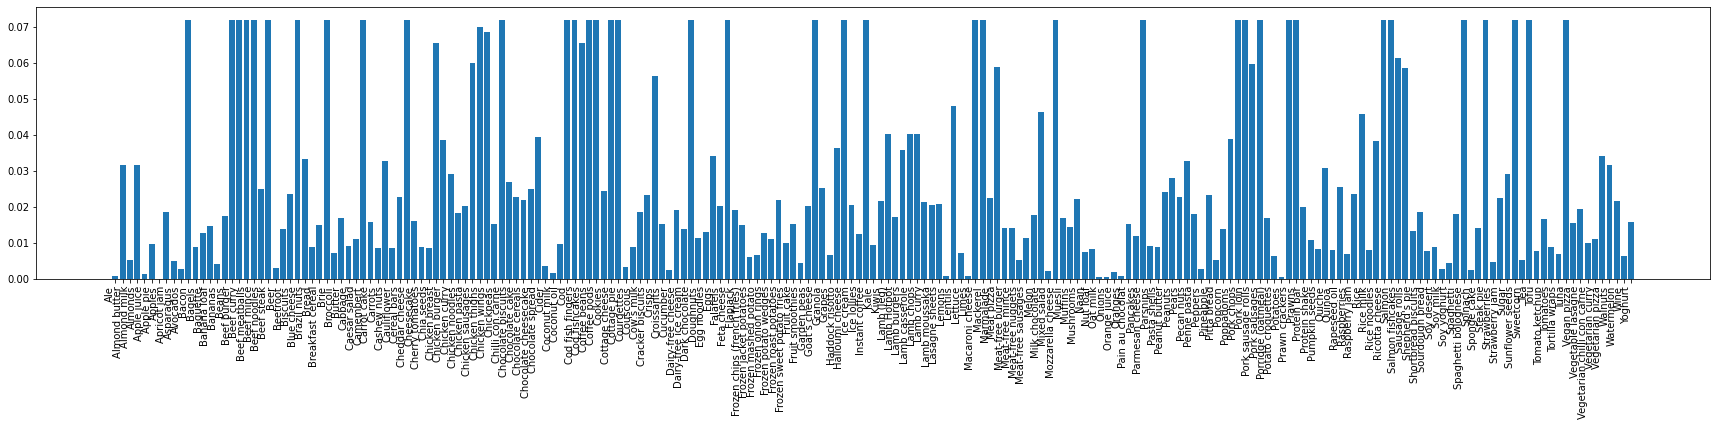

In [20]:
fig, ax = plt.subplots(figsize=(30, 5))
ax.bar(InternetData['Entity'], InternetData['Eutrophication per kilogram'])
plt.xticks(rotation=90, ha='right')